>## MoonLight Energy Solutions for togo

In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
from windrose import WindroseAxes
import os
os.chdir('..')

>>### load togo data.

In [2]:
data = pd.read_csv("./data/togo-dapaong_qc.csv")

>>### verify loaded data

In [3]:
data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,10/25/2021 0:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,10/25/2021 0:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,10/25/2021 0:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,10/25/2021 0:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,10/25/2021 0:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,10/25/2021 0:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,10/25/2021 0:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,10/25/2021 0:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,10/25/2021 0:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,10/25/2021 0:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


>>#### provides a quick overview of a DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

>>### Summary statistics

In [5]:
from scripts.summaryStatics import calculate_summary

calculate_summary(data)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


>>### mising value

In [6]:
missing_values = data.isnull().sum()
missing_values.all


<bound method Series.all of Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64>

>> ### Remove missing values

In [7]:
data = data.drop(columns='Comments')
data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,10/25/2021 0:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,10/25/2021 0:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,10/25/2021 0:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,10/25/2021 0:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,10/25/2021 0:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
5,10/25/2021 0:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5
6,10/25/2021 0:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5
7,10/25/2021 0:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5
8,10/25/2021 0:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5
9,10/25/2021 0:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5


>>### detect outlier


In [8]:
# Detect outliers
from scripts.detectOutliers import detect_outliers
outliers = detect_outliers(data)

>>### graph before Outliers Removed

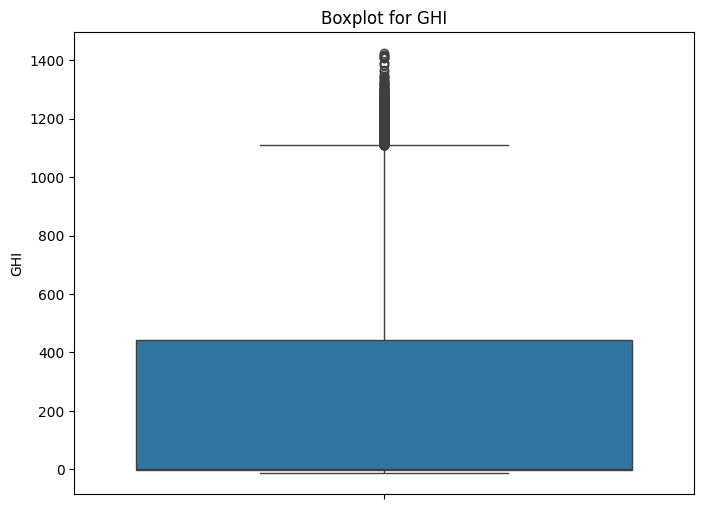

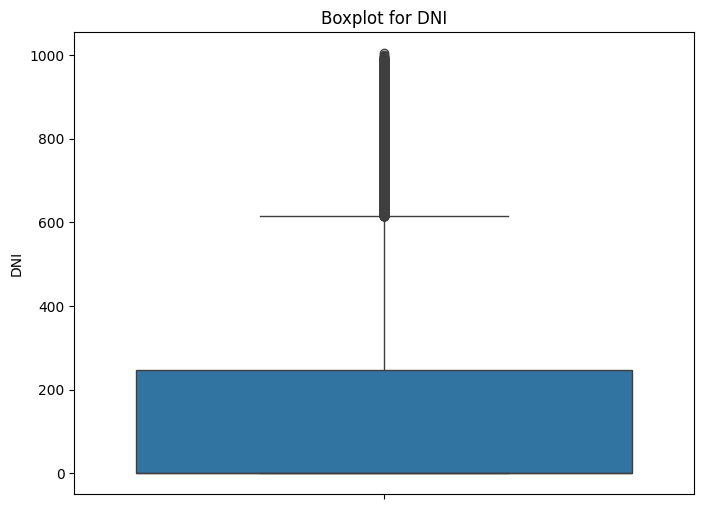

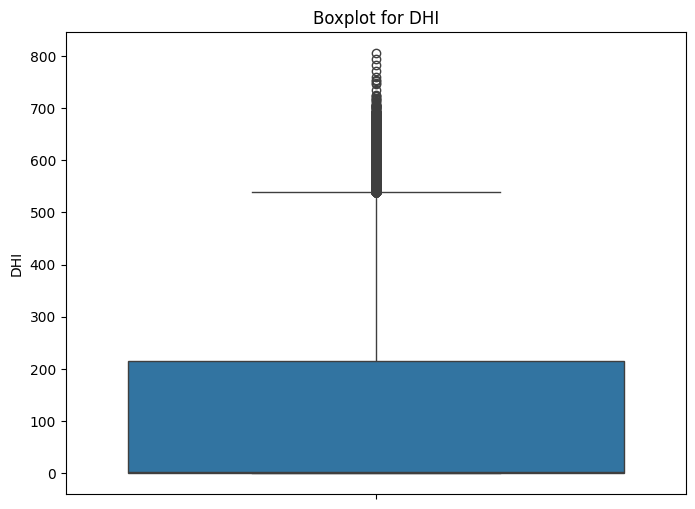

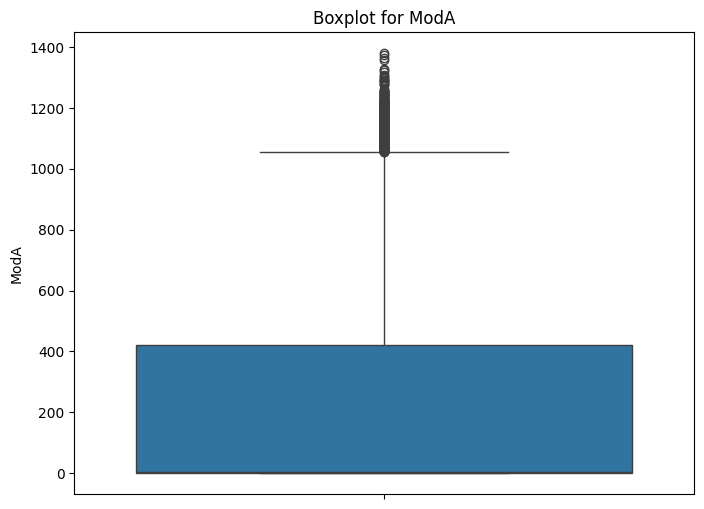

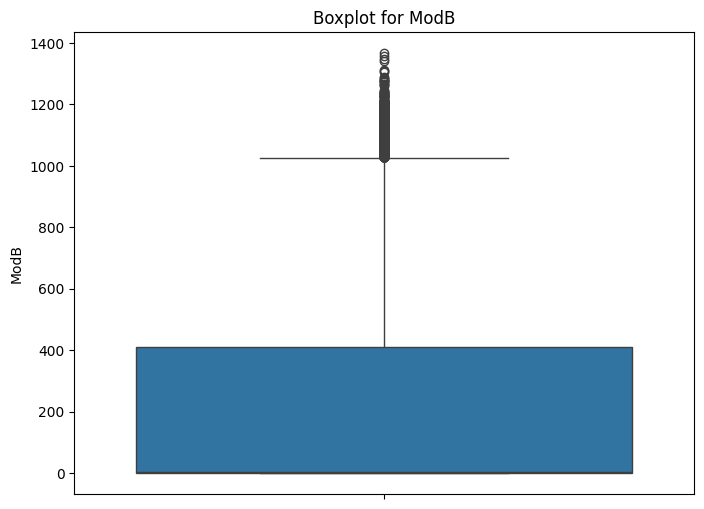

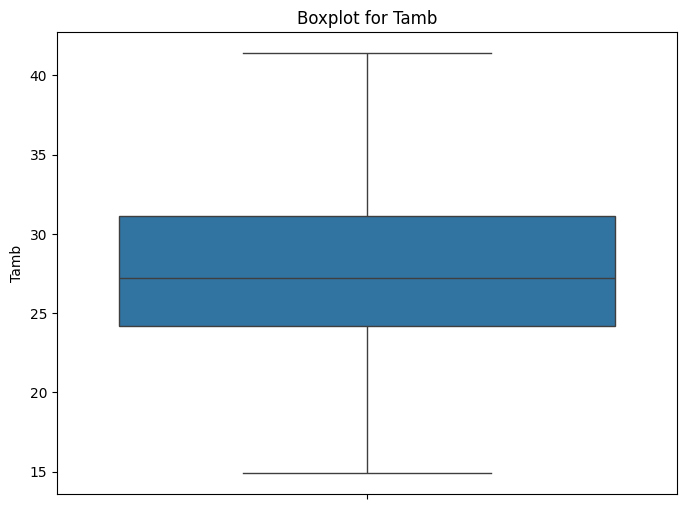

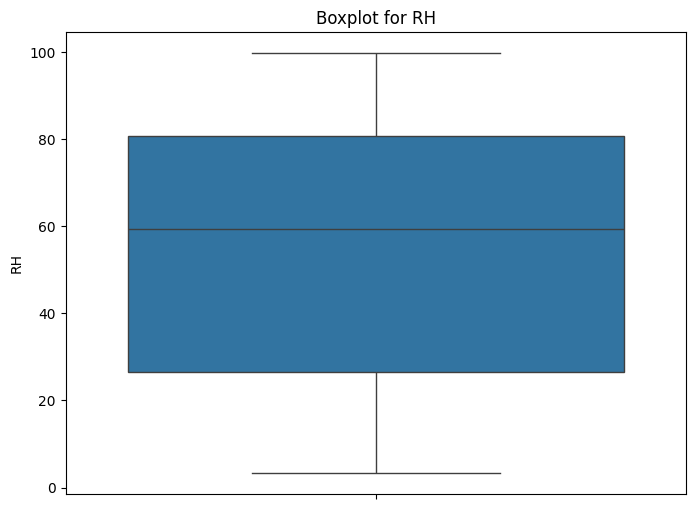

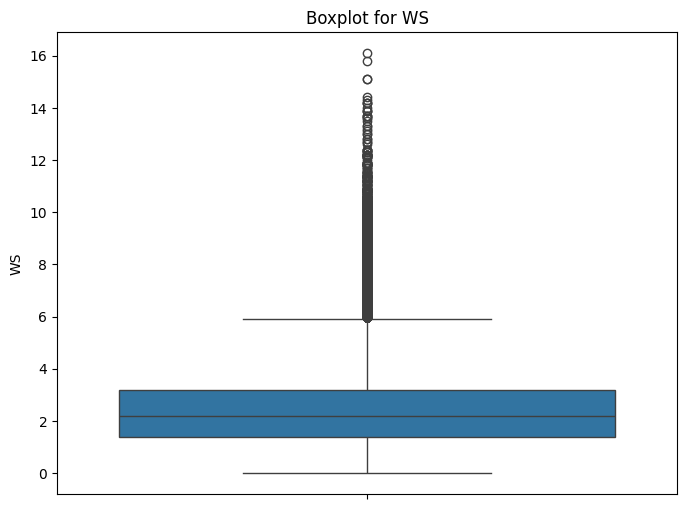

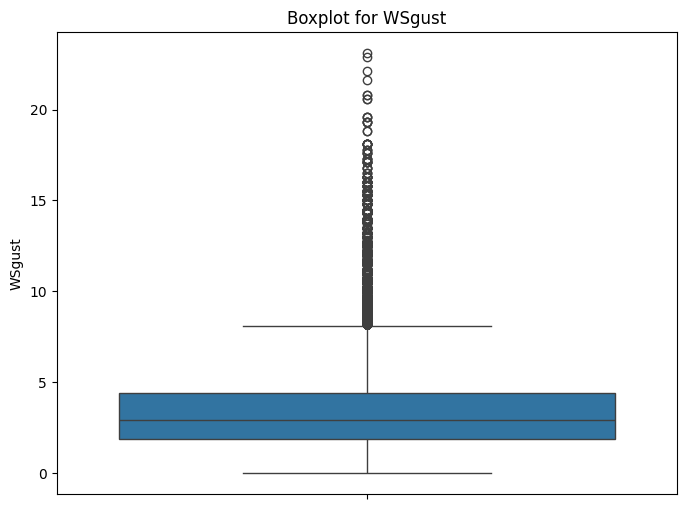

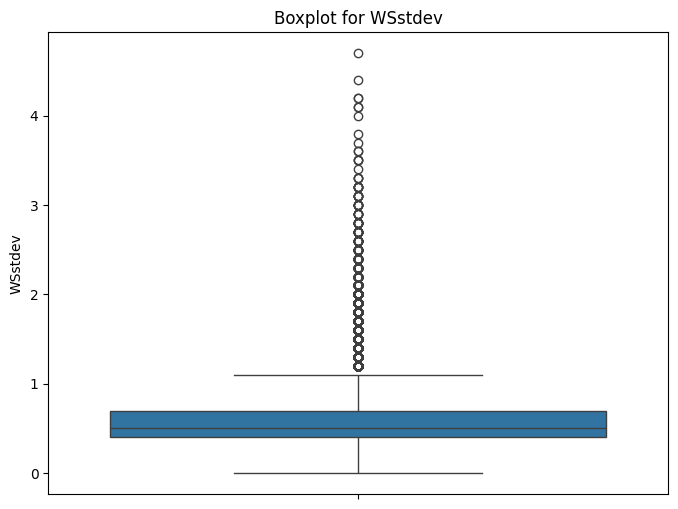

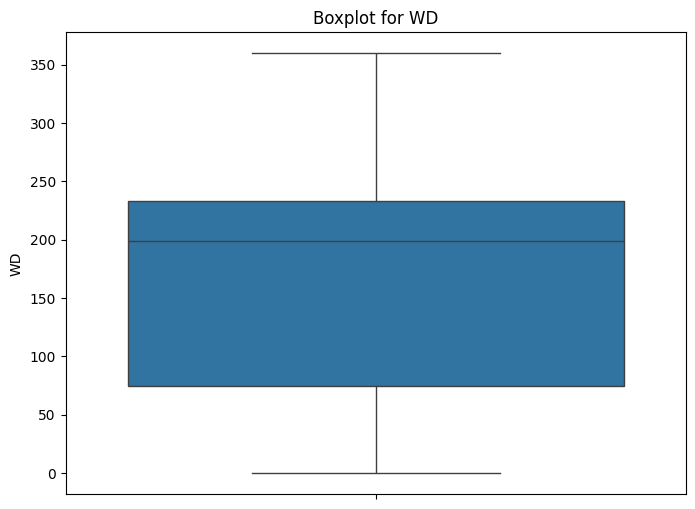

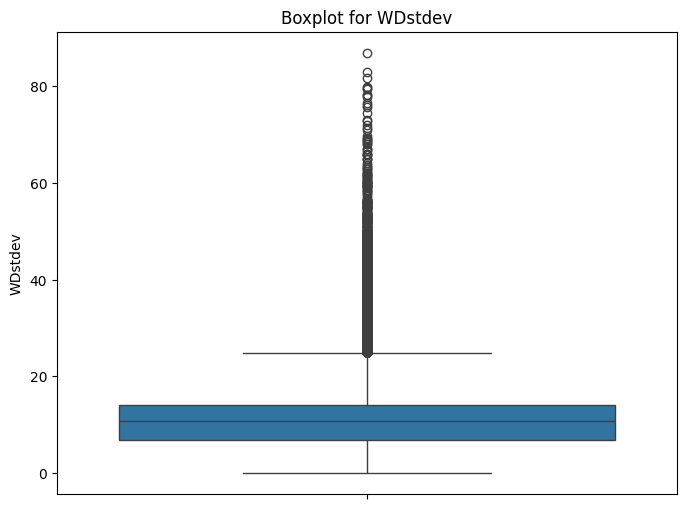

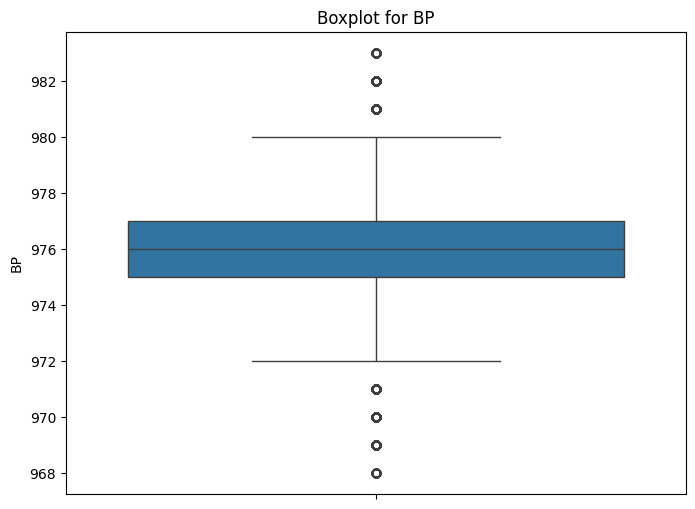

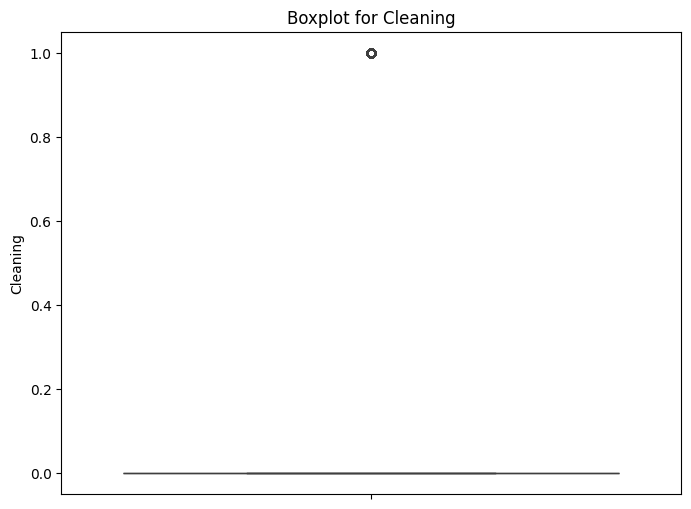

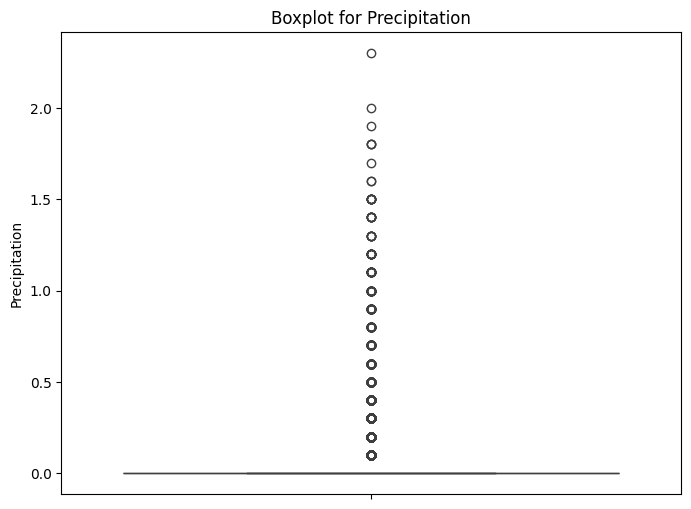

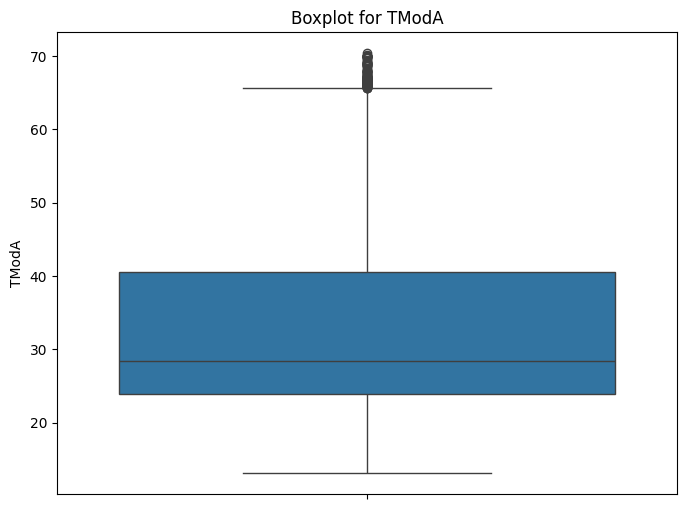

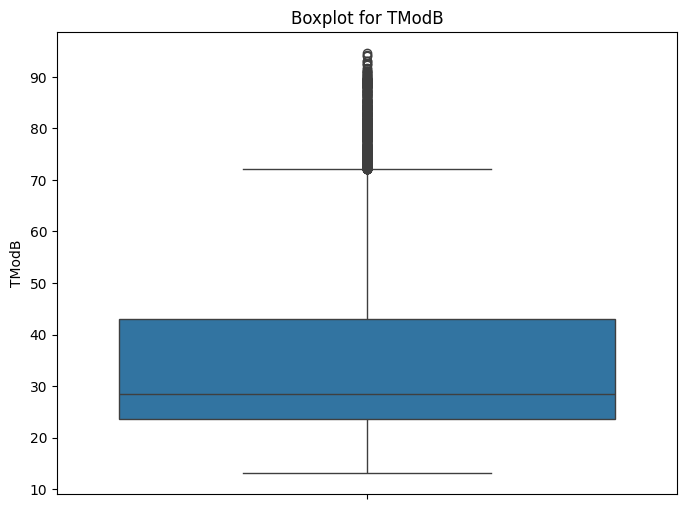

In [9]:
from scripts.plotOutliers import plot_outliers

# Plot outliers
plot_outliers(data, outliers)

>>>#### check value count if their outliers must be removed or not

In [10]:
data['Cleaning'].value_counts().count

<bound method Series.count of Cleaning
0    525319
1       281
Name: count, dtype: int64>

In [11]:
data['Precipitation'].value_counts().count

<bound method Series.count of Precipitation
0.0    522262
0.1      2285
0.2       314
0.3       203
0.4       125
0.5        96
0.6        81
0.7        54
0.9        40
0.8        38
1.0        34
1.1        23
1.2        15
1.5         8
1.4         7
1.3         6
1.8         3
1.6         2
1.9         1
2.0         1
1.7         1
2.3         1
Name: count, dtype: int64>

>> ### Removing Outliers 

In [12]:
from scripts.removeOutliers import remove_outliers

# Exclude the 'Cleaning' column while processing all numeric columns
data = remove_outliers(data, exclude_columns=['Cleaning'])

>> ### Graph after Outliers Removed

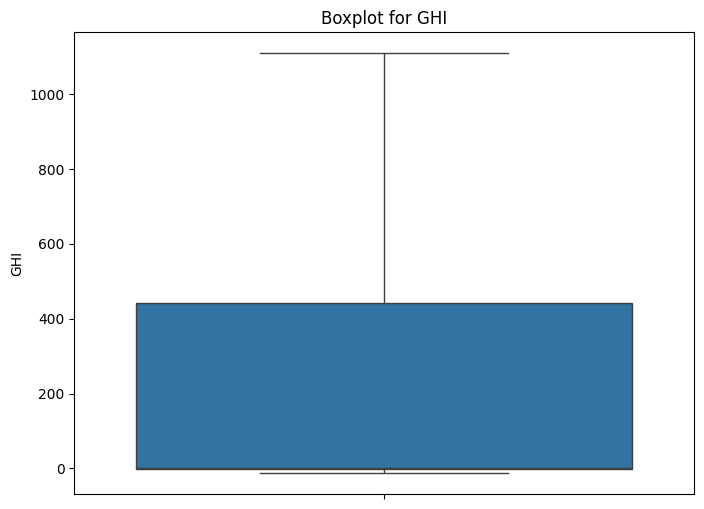

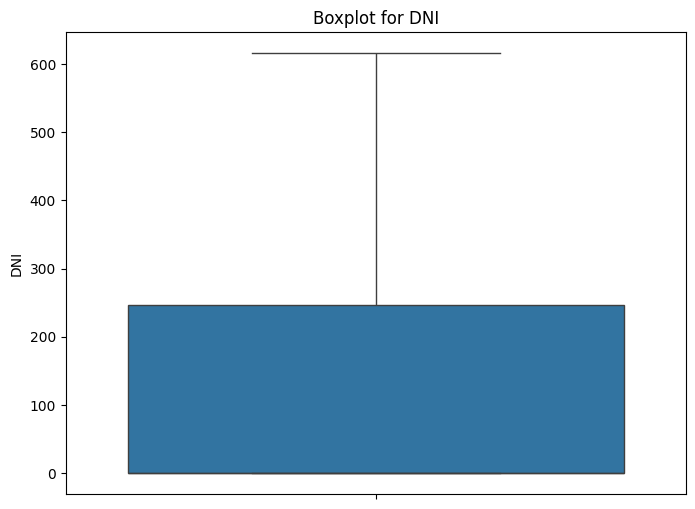

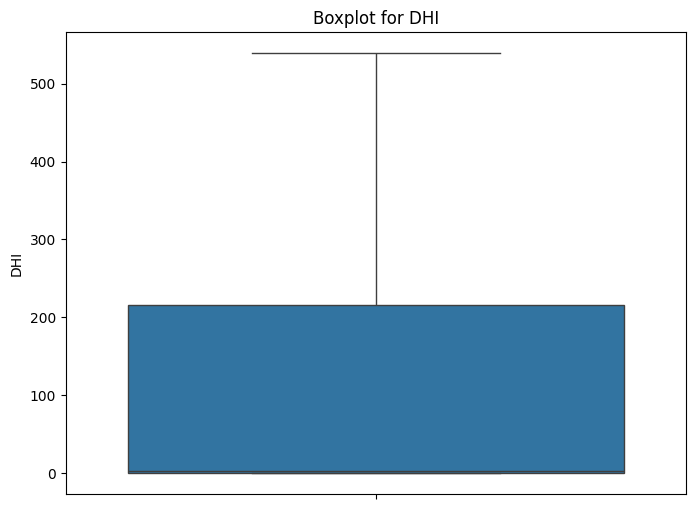

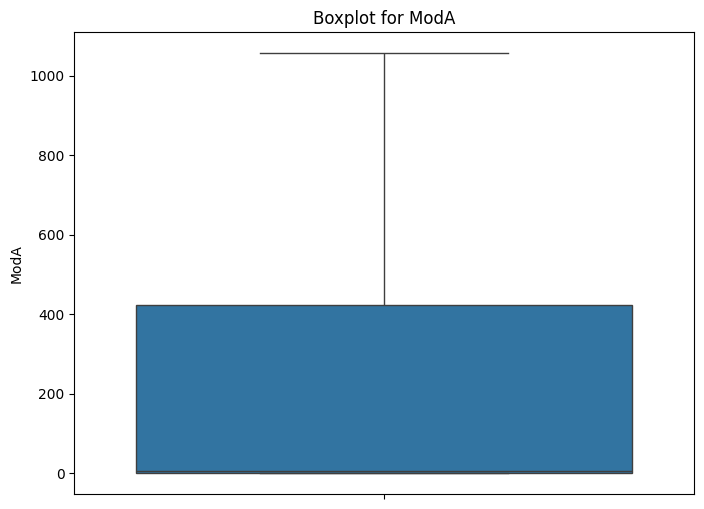

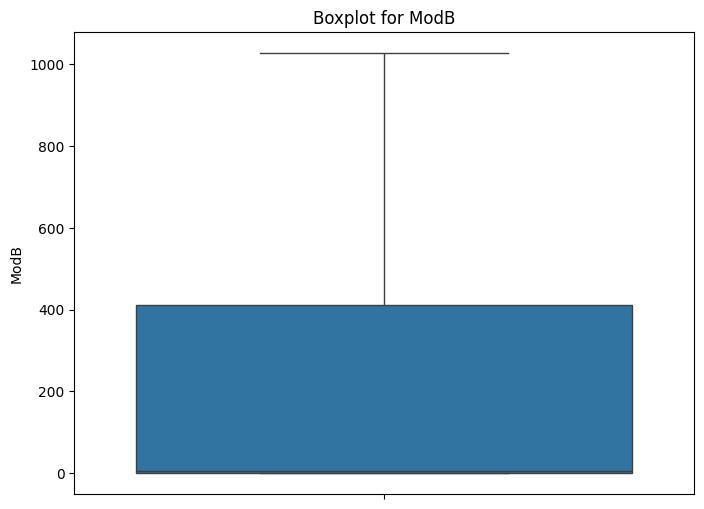

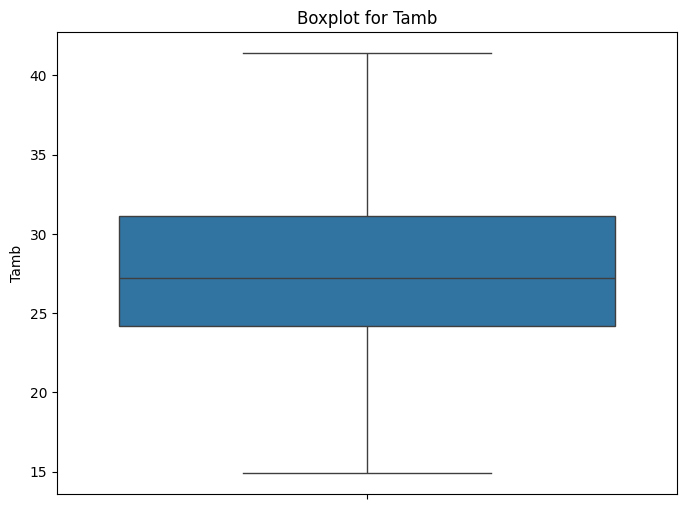

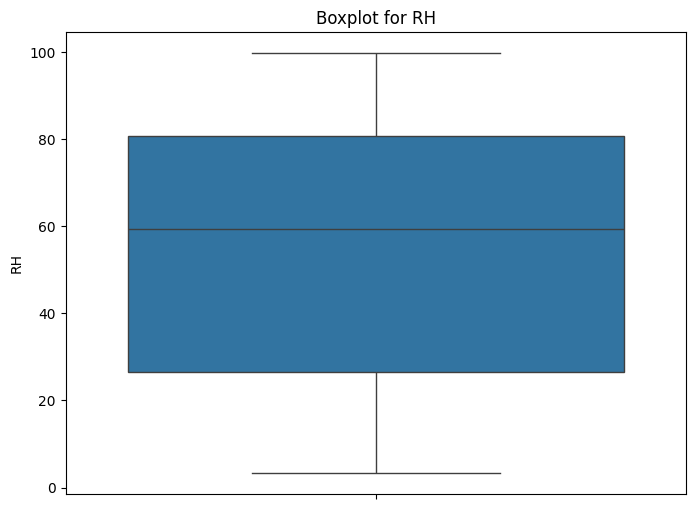

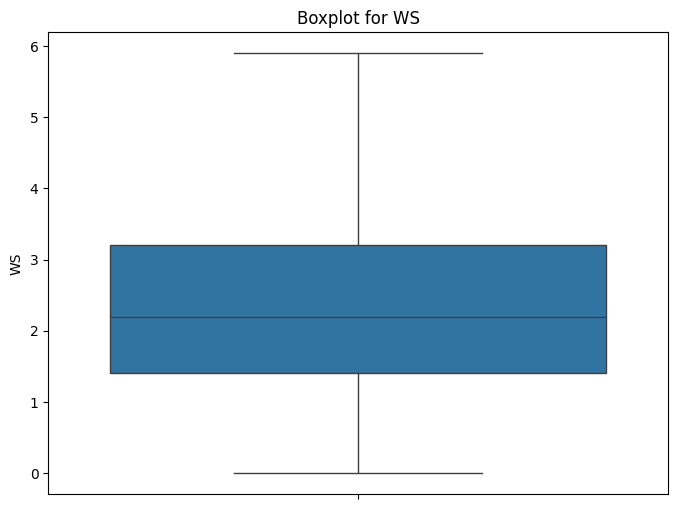

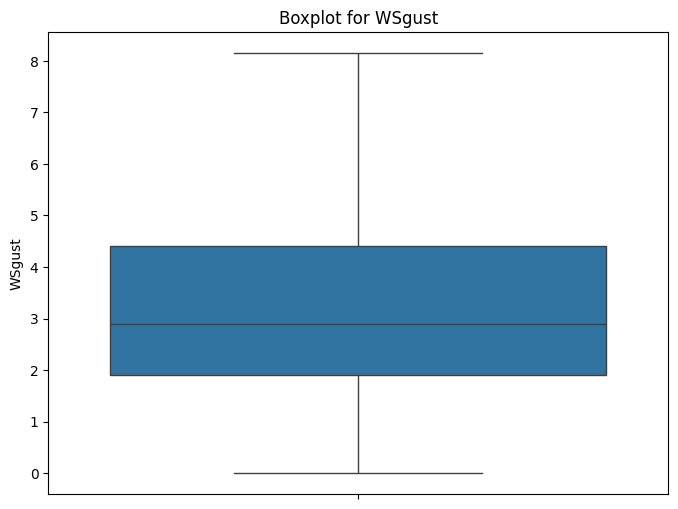

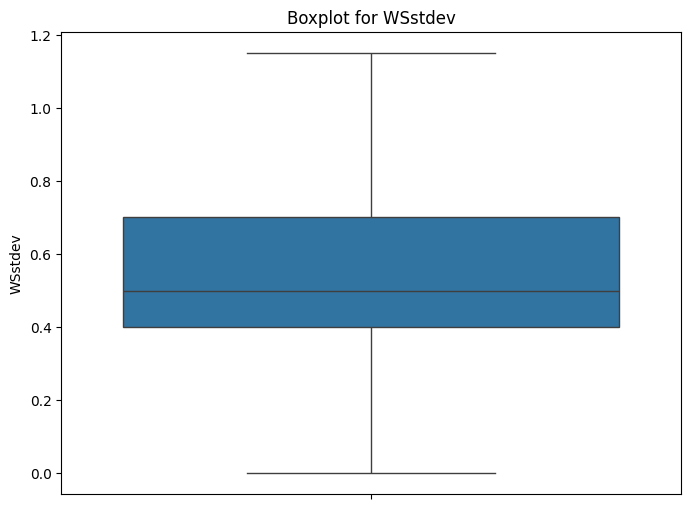

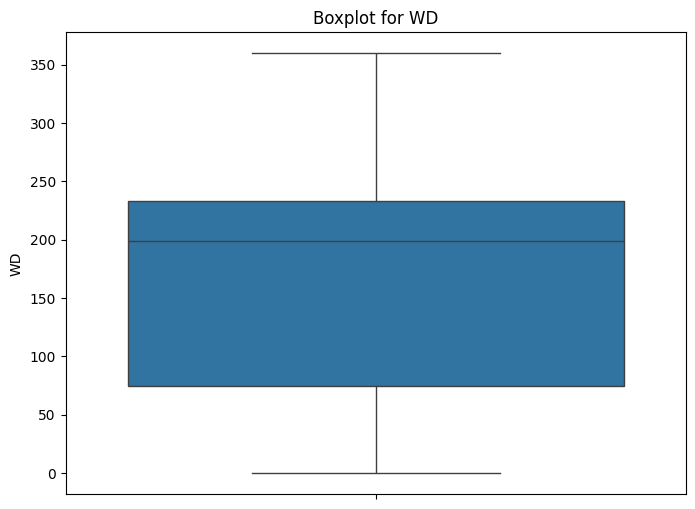

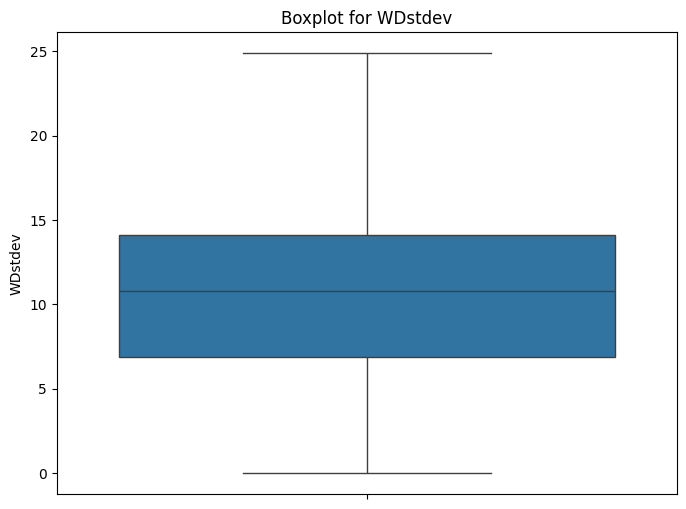

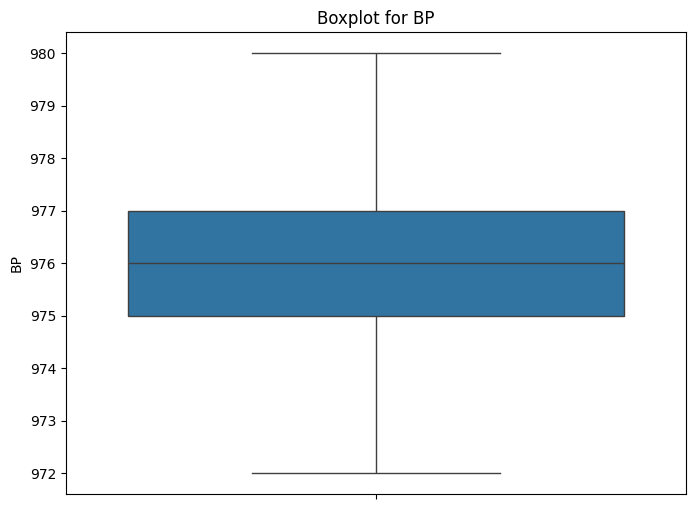

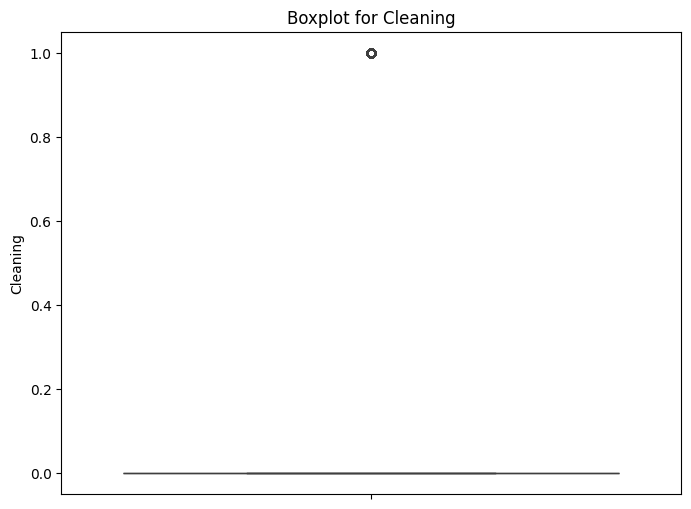

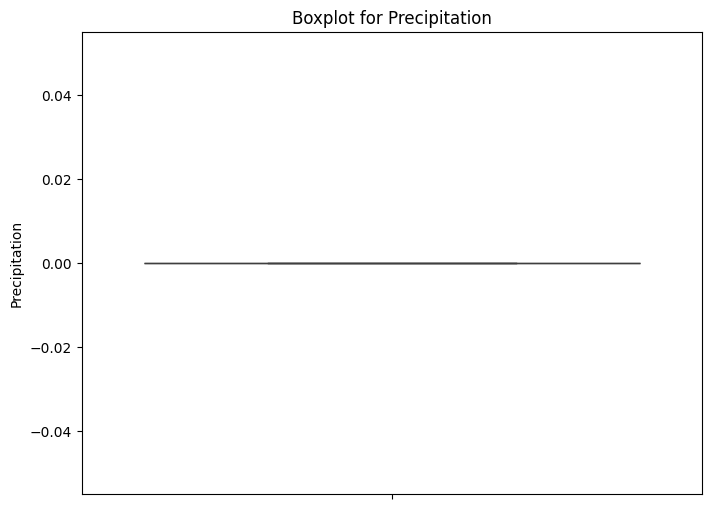

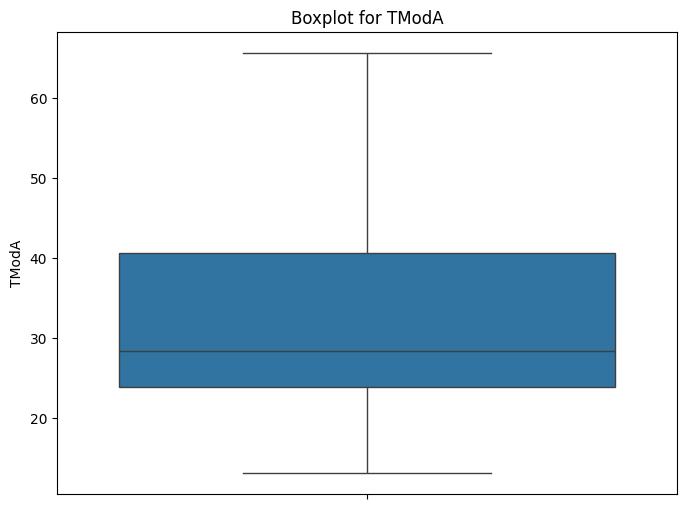

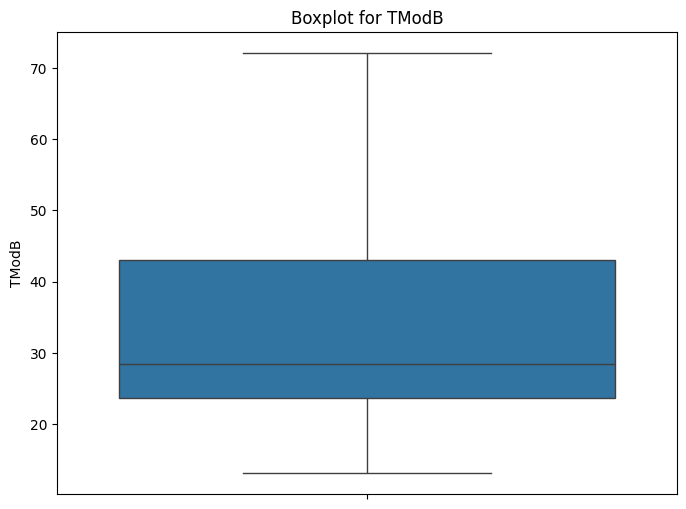

In [13]:
from scripts.plotOutliers import plot_outliers

# Plot outliers
plot_outliers(data, outliers)

>>> ##### Columns that must be positive:
GHI, DNI, DHI, ModA, ModB, WS, WSgust, WSstdev, BP, Precipitation


>> ##### checking incorrect entries (e.g., negative values where only positive should exist),

In [14]:
from scripts.checkingAndCleaningNegativeValues import check_negative_entries

positiveColumns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation']

incorrectEntries = check_negative_entries(data, positiveColumns)

print(incorrectEntries)

        GHI  DNI  DHI  ModA  ModB  WS  WSgust  WSstdev  BP  Precipitation
0      -1.3  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
1      -1.3  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
2      -1.3  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
3      -1.2  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
4      -1.2  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
...     ...  ...  ...   ...   ...  ..     ...      ...  ..            ...
525595 -0.8  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
525596 -0.9  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
525597 -1.0  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
525598 -1.1  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN
525599 -1.2  NaN  NaN   NaN   NaN NaN     NaN      NaN NaN            NaN

[525600 rows x 10 columns]


>>>> ##### negative ratio of 'DHI', 'DNI', 'GHI'

In [15]:
columnsToCheck = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev', 'BP', 'Precipitation']

# Calculate the proportion of negative values in each column
negativeRatio = (data[columnsToCheck] < 0).mean()

# Print the proportion of negative values for each column
for column, ratio in negativeRatio.items():
    print(f"Proportion of negative values in {column}: {ratio:.2%}")

# Print descriptive statistics for the columns
print(data[columnsToCheck].describe())


Proportion of negative values in GHI: 48.97%
Proportion of negative values in DNI: 0.00%
Proportion of negative values in DHI: 0.00%
Proportion of negative values in ModA: 0.00%
Proportion of negative values in ModB: 0.00%
Proportion of negative values in WS: 0.00%
Proportion of negative values in WSgust: 0.00%
Proportion of negative values in WSstdev: 0.00%
Proportion of negative values in BP: 0.00%
Proportion of negative values in Precipitation: 0.00%
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.404701     139.858936     115.717469     226.009657   
std       322.097353     224.275736     154.357163     316.972368   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.

>> ### Replace negative values with zero

In [17]:
from scripts.checkingAndCleaningNegativeValues import replace_negative_with_zero
# Columns to clean
columns_to_clean = ['GHI']

# Replace negative values with zero
cleaned_data = replace_negative_with_zero(data, columns_to_clean)

cleaned_data



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,10/25/2021 0:01,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,10/25/2021 0:02,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,10/25/2021 0:03,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,10/25/2021 0:04,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,10/25/2021 0:05,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,10/24/2022 23:56,0.0,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,10/24/2022 23:57,0.0,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,10/24/2022 23:58,0.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,10/24/2022 23:59,0.0,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


>> ## Time Series Analysis:

In [18]:
from scripts.timeSeriesAnalysisMonthlyAndDailyTrend import preprocess_timestamp

data = preprocess_timestamp(data)

>>> #### plot by monthly trend 

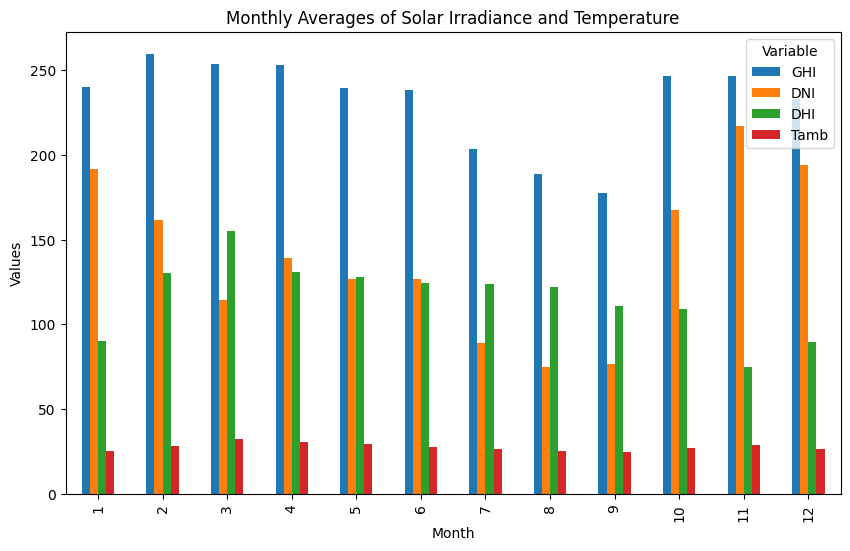

In [19]:
from scripts.timeSeriesAnalysisMonthlyAndDailyTrend import analyze_and_plot_monthly_trends

analyze_and_plot_monthly_trends(data, columns=['GHI', 'DNI', 'DHI', 'Tamb'])

>>> #### plot daily trends

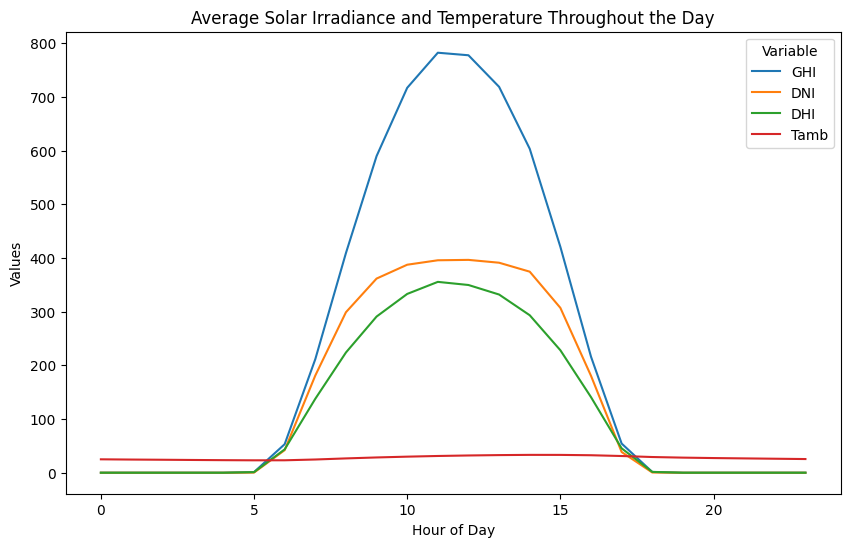

In [20]:
from scripts.timeSeriesAnalysisMonthlyAndDailyTrend import analyze_and_plot_hourly_trends

analyze_and_plot_hourly_trends(data, columns=['GHI', 'DNI', 'DHI', 'Tamb'])

>>> #### Compare Sensor Readings Before and After Cleaning

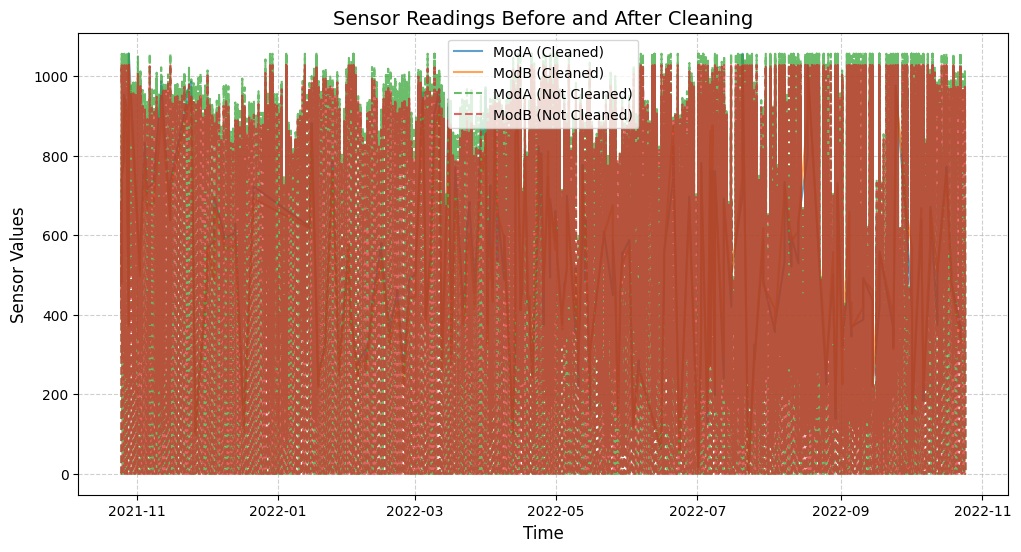

In [21]:
from scripts.compareSensorReading import plot_sensor_readings
plot_sensor_readings(data, timestamp_col='Timestamp', cleaning_col='Cleaning', mod_a_col='ModA', mod_b_col='ModB')

>>> #### Highlight Anomalies

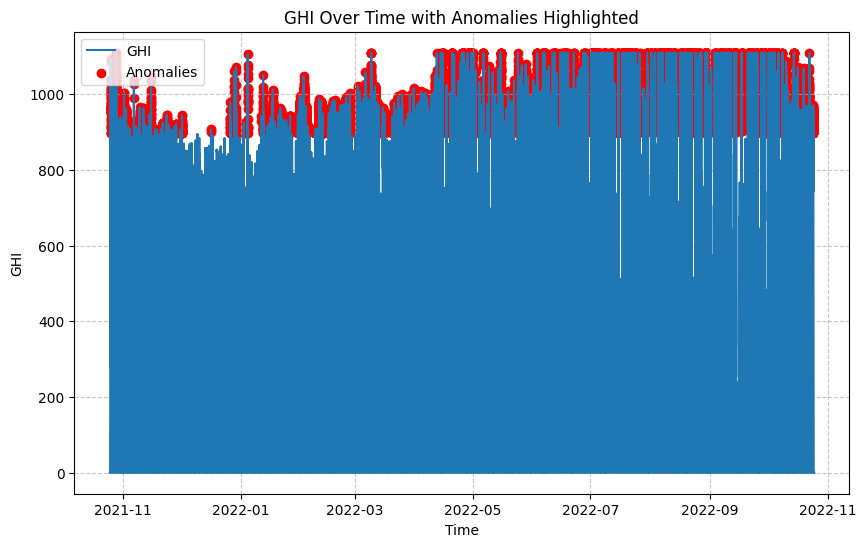

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Month,Hour
671,2021-10-25 11:12:00,932.0,495.2,509.2,975.0000,963.0,31.0,69.8,1.0,2.7,0.9,265.4,24.9,978,0,0.0,51.4,56.4,10,11
672,2021-10-25 11:13:00,962.0,532.7,503.5,1000.0000,987.0,31.2,69.6,2.4,3.4,0.6,265.3,10.4,978,0,0.0,52.9,58.2,10,11
673,2021-10-25 11:14:00,897.0,478.5,486.3,940.0000,928.0,31.2,68.2,2.5,2.9,0.3,265.2,6.8,978,0,0.0,54.0,59.7,10,11
674,2021-10-25 11:15:00,1094.0,616.0,490.8,1056.3125,1027.5,31.2,67.9,1.3,2.1,0.7,262.9,12.1,978,0,0.0,55.0,61.0,10,11
675,2021-10-25 11:16:00,1085.0,616.0,491.6,1056.3125,1027.5,31.2,66.5,1.6,2.1,0.5,248.9,15.8,978,0,0.0,56.4,62.6,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524930,2022-10-24 12:51:00,897.0,616.0,165.3,937.0000,902.0,34.7,28.5,4.5,6.2,1.0,74.7,14.6,976,0,0.0,47.9,49.7,10,12
524931,2022-10-24 12:52:00,897.0,616.0,165.2,937.0000,902.0,34.7,27.1,5.3,6.7,0.9,74.0,17.1,976,0,0.0,47.7,49.5,10,12
524933,2022-10-24 12:54:00,898.0,616.0,165.2,938.1000,903.0,34.8,27.2,4.5,5.7,0.7,58.1,15.7,976,0,0.0,47.5,49.1,10,12
524934,2022-10-24 12:55:00,897.0,616.0,164.8,938.1000,903.0,34.8,26.9,4.9,6.4,0.7,60.3,11.2,976,0,0.0,47.4,49.0,10,12


In [22]:
from scripts.anomaliesDetectionAndPlot import detect_and_plot_anomalies

# Detect and plot anomalies for 'GHI'
anomalies = detect_and_plot_anomalies(data, value_col='GHI', timestamp_col='Timestamp', threshold_percentile=0.95)

# Display anomalies
anomalies

>>### Correlation Analysis involves identifying relationships between variables.

>>##### Correlation Matrix and Heatmap

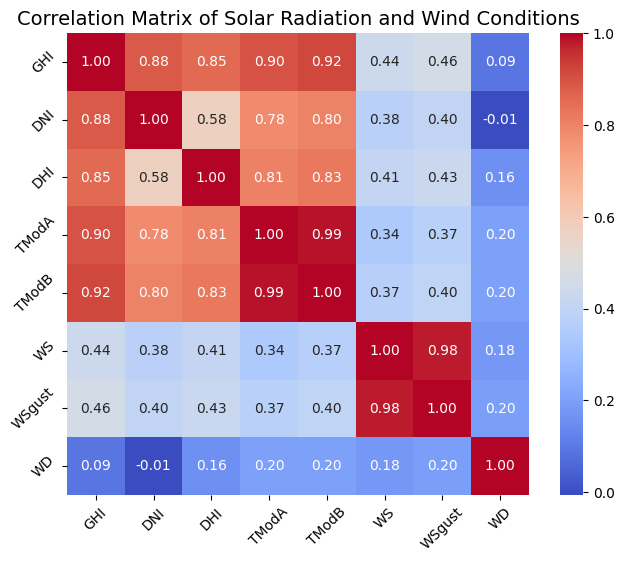

In [23]:
from scripts.correlationAndHeatMapping import plot_correlation_heatmap
# Columns to analyze
columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']

# Plot correlation heatmap and get the matrix
correlation_matrix = plot_correlation_heatmap(data, columns, title="Correlation Matrix of Solar Radiation and Wind Conditions")

>> ### Wind Analysis

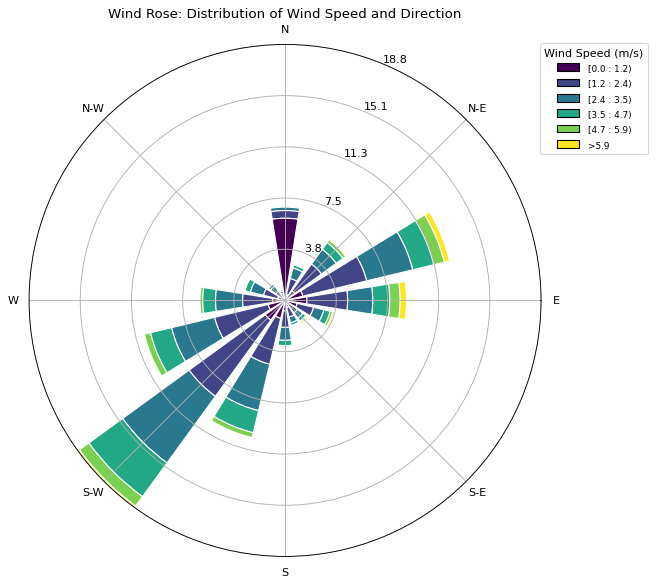

Average Wind Direction Variability (Standard Deviation): 10.49°
Calculated Average Wind Variability: 10.49°


In [24]:
from scripts.windAnalysis import analyze_wind
# Perform wind analysis
variability_mean = analyze_wind(data, wind_speed_col='WS', wind_dir_col='WD', wind_dir_stdev_col='WDstdev')
print(f"Calculated Average Wind Variability: {variability_mean:.2f}°")

>> ### Temprature Analysis

>> #### Scatter Plot Relative Humidity vs Temperature

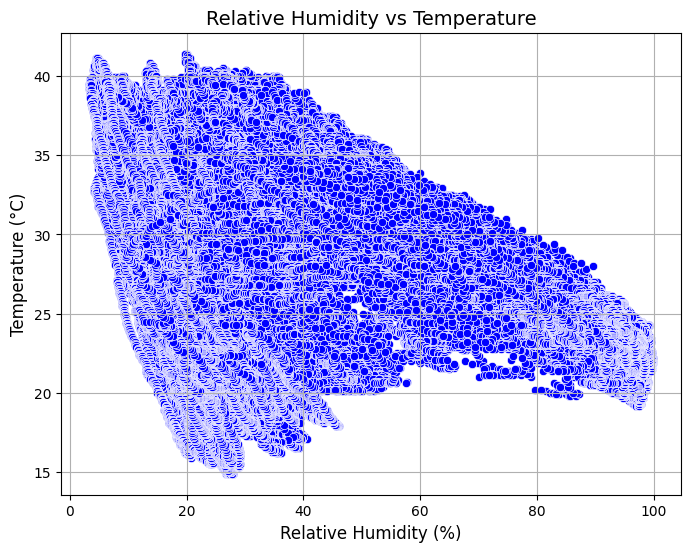

In [25]:
from scripts.scatterPlot import plot_scatter_or_regression


TempData = data.dropna(subset=['RH', 'Tamb', 'GHI'])

plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='Tamb',
    title='Relative Humidity vs Temperature',
    x_label='Relative Humidity (%)',
    y_label='Temperature (°C)',
    color='blue',
    regression=False  # No regression line
)

>> #### scatter Plot: RH vs Solar Radiation

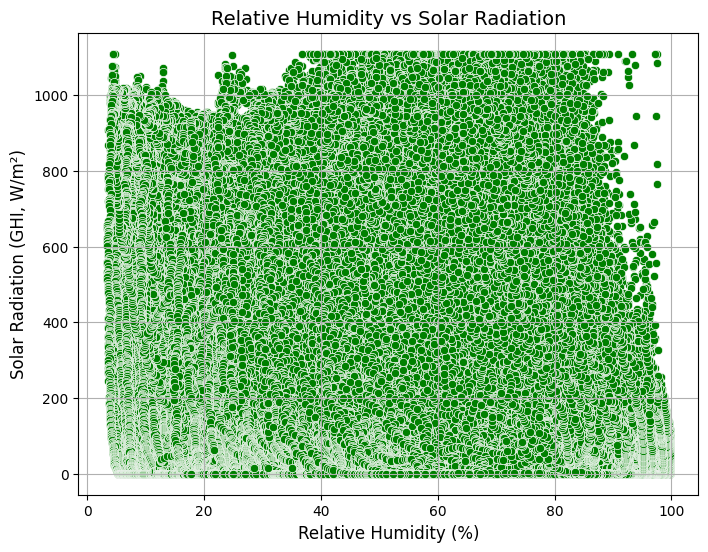

In [26]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='GHI',
    title='Relative Humidity vs Solar Radiation',
    x_label='Relative Humidity (%)',
    y_label='Solar Radiation (GHI, W/m²)',
    color='green',
    regression=False  # No regression line
)

>> #### Regression Plot: RH vs Temperature

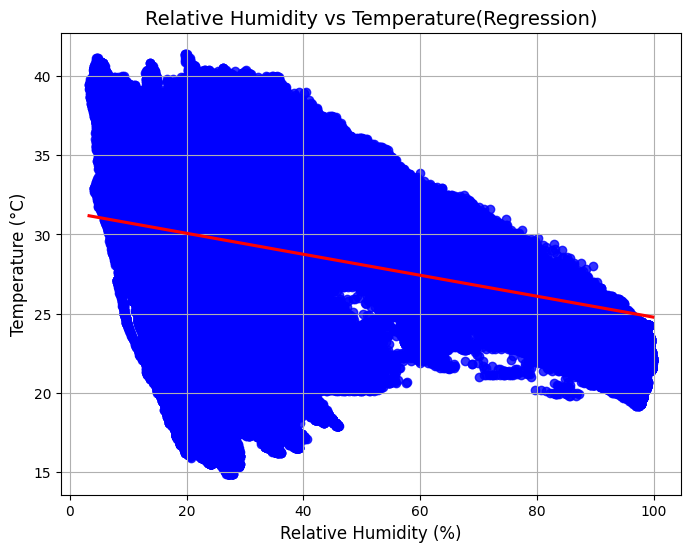

In [27]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='Tamb',
    title='Relative Humidity vs Temperature(Regression)',
    x_label='Relative Humidity (%)',
    y_label='Temperature (°C)',
    color='blue',
    regression=True  # No regression line
)

>> #### Regression Plot: RH vs Solar Radiation

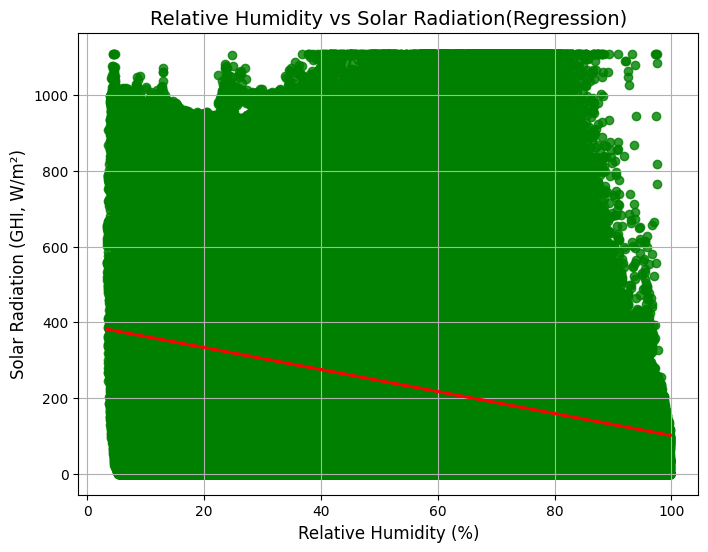

In [28]:
plot_scatter_or_regression(
    data=TempData,
    x_col='RH',
    y_col='GHI',
    title='Relative Humidity vs Solar Radiation(Regression)',
    x_label='Relative Humidity (%)',
    y_label='Solar Radiation (GHI, W/m²)',
    color='green',
    regression=True  # No regression line
)

>> ### Histogram

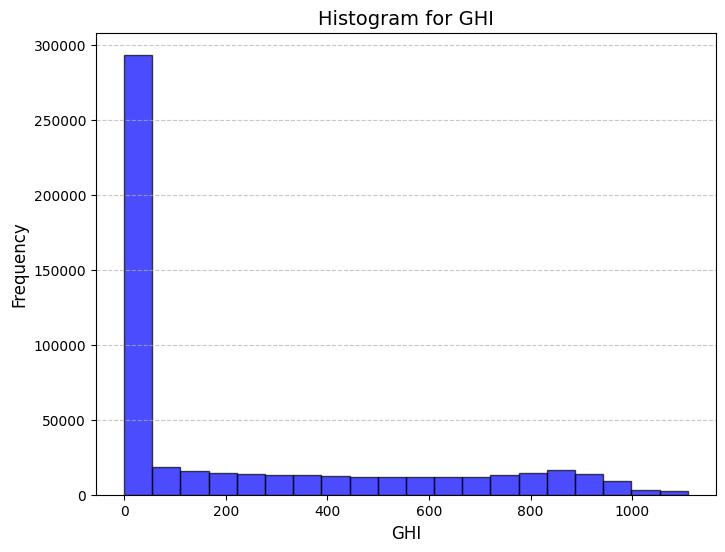

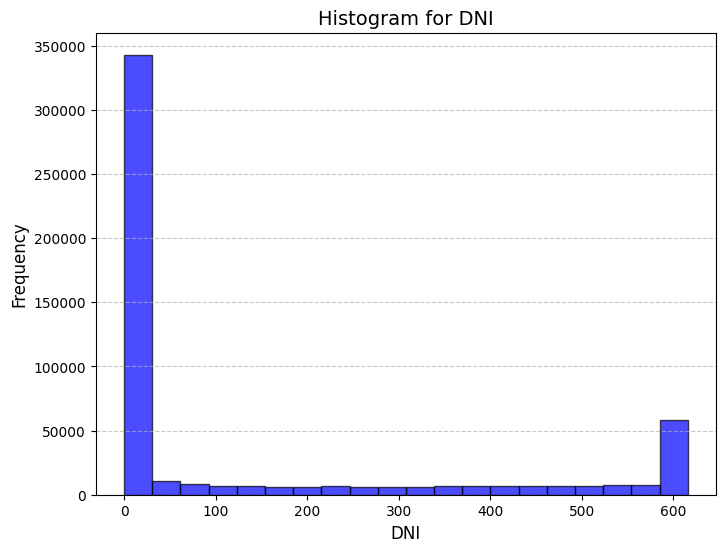

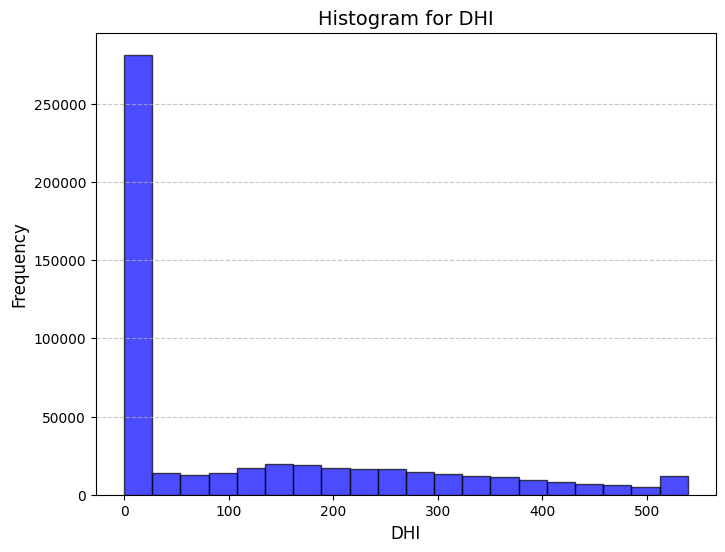

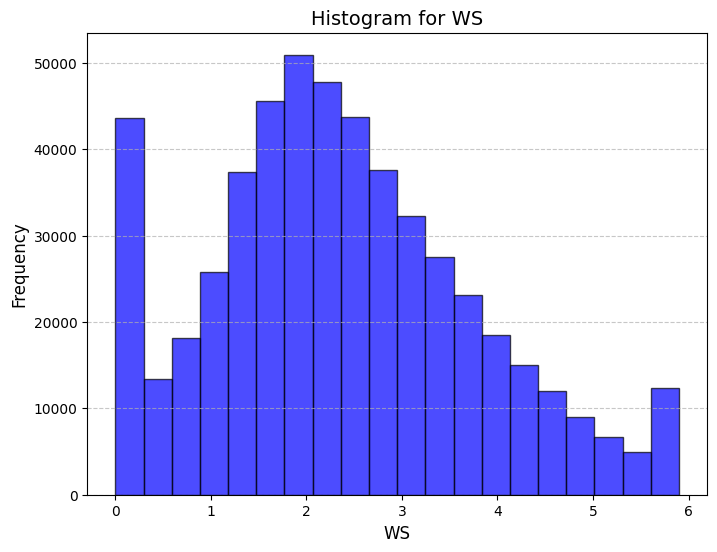

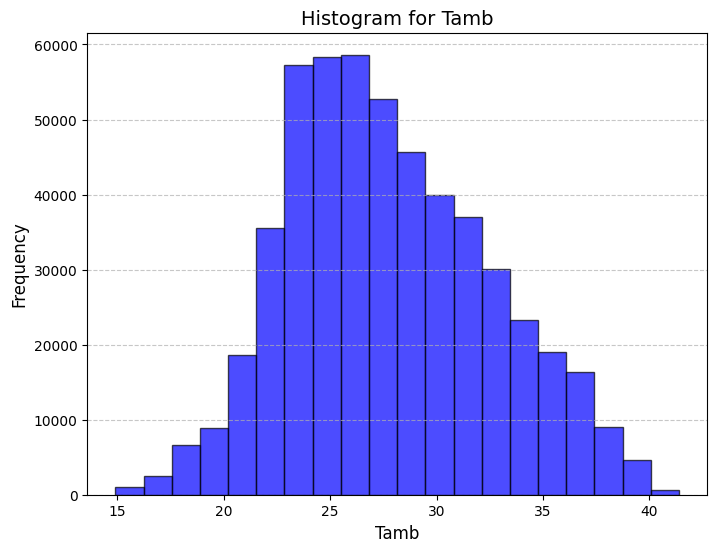

In [29]:
from scripts.histogram import plot_histograms

# Specify the columns to plot histograms for
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Call the function with specific columns
plot_histograms(data, columns=columns_to_plot, bins=20, color='blue')

>> ### z score

In [30]:
from scripts.zScore import z_score_analysis

z_score_threshold = 3
results = z_score_analysis(data, threshold=z_score_threshold)

In [31]:
results.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Precipitation_zscore,Precipitation_outlier,TModA_zscore,TModA_outlier,TModB_zscore,TModB_outlier,Month_zscore,Month_outlier,Hour_zscore,Hour_outlier
0,2021-10-25 00:01:00,0.0,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,NaN,False,-0.704186,False,-0.716919,False,1.007575,False,-1.661323,False
1,2021-10-25 00:02:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,NaN,False,-0.704186,False,-0.716919,False,1.007575,False,-1.661323,False
2,2021-10-25 00:03:00,0.0,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,NaN,False,-0.704186,False,-0.716919,False,1.007575,False,-1.661323,False
3,2021-10-25 00:04:00,0.0,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,NaN,False,-0.704186,False,-0.716919,False,1.007575,False,-1.661323,False
4,2021-10-25 00:05:00,0.0,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,NaN,False,-0.704186,False,-0.716919,False,1.007575,False,-1.661323,False
5,2021-10-25 00:06:00,0.0,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,...,NaN,False,-0.695093,False,-0.709072,False,1.007575,False,-1.661323,False
6,2021-10-25 00:07:00,0.0,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,...,NaN,False,-0.695093,False,-0.709072,False,1.007575,False,-1.661323,False
7,2021-10-25 00:08:00,0.0,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,...,NaN,False,-0.695093,False,-0.709072,False,1.007575,False,-1.661323,False
8,2021-10-25 00:09:00,0.0,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,...,NaN,False,-0.695093,False,-0.709072,False,1.007575,False,-1.661323,False
9,2021-10-25 00:10:00,0.0,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,...,NaN,False,-0.695093,False,-0.709072,False,1.007575,False,-1.661323,False


>> ### bubble chart

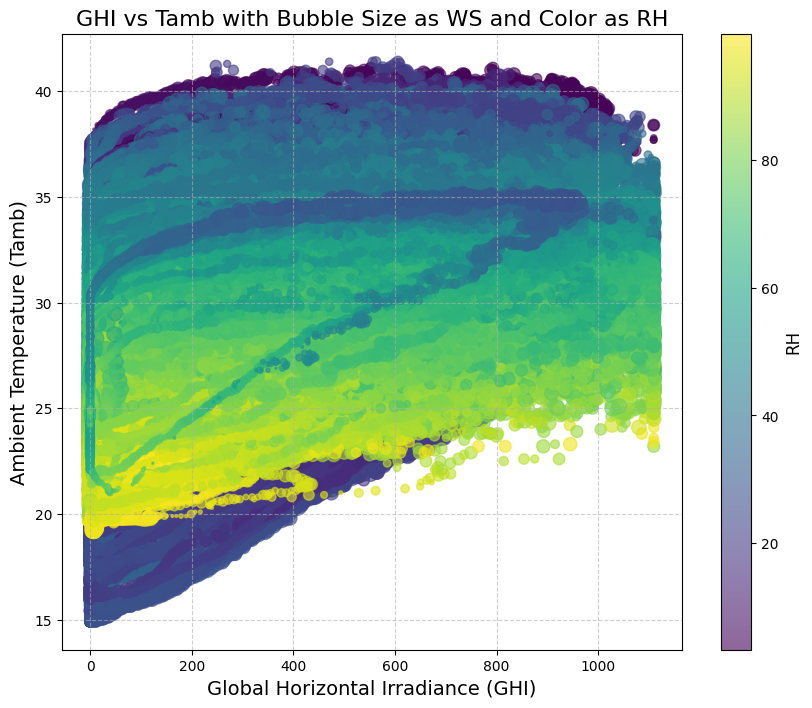

In [32]:
# Import the function from the script
from scripts.bubbleChart import plot_bubble_chart


plot_bubble_chart(
    data=data,
    x_col='GHI',  
    y_col='Tamb',  
    size_col='WS',  
    color_col='RH', 
    title='GHI vs Tamb with Bubble Size as WS and Color as RH',
    xlabel='Global Horizontal Irradiance (GHI)',
    ylabel='Ambient Temperature (Tamb)'
)
